In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib as mpl
%matplotlib inline

# Gradient Descent

## Problem

We consider the probem of finding x solution of :
$$
\underset{x \in \mathbb{R}^d}{min} \ f(x)
$$
with $C(x)$  a differentiable cost function.

The original gradient descent algorithm consists in creating  a sequence of $(x^{(n)})$'s that will converge towards a **local minimum of $f$**. 

The sequence is given by :
\begin{equation}
\left\{
\begin{aligned}
&x^{(0)} \in \mathbb{R}^d \\
&x^{(n+1)} = x^{(n)} - \delta_n \nabla f(x^{(n)})
\end{aligned}
\right.
\end{equation}

where $\delta_n > 0$ is a learning step, $\nabla C(x^{(n)}) \in \mathbb{R}^d$ the gradient of $f$ at point $x^{(n)}$.

Choice on the learning step $\delta$ is really important to obtain convergence. To optimize this learning step $\delta$, several variants of the gradient descent exist. You can consider :
- a constant $\delta$
- a decreasing $\delta$ in time
- accelerated (Nesterov), adapted (Adagrad)
- ...

**Instruction**: create a first gradient descent function, which takes as argument a constant learning step, an initial value $x^{(0)}$ and the function computing gradient at point x. 

In [18]:
'''
TO DO
'''

def gradient_descent(x_start, delta, gradient_function, n_steps=20):
    '''
    x_start : (d,)
    delta : value 
    gradient_function : function giving the gradient at x
    -----
    returns x_seq : array (n_steps,d) with successive values of x in the gradient descent algorithm
    '''
    d     = len(x_start) 
    x_seq = np.zeros((n_steps, d)) 
    for i in range(n_steps): 
        if (i == 0): 
            x_seq[i] = x_start 
        else: 
            x_seq[i] = x_seq[i-1] - delta * gradient_function(x_seq[i-1]) 
    
    return x_seq 

## Gradient descent in 2-D

We consider a simple problem, corresponding to the minimization of a 2-D quadratic form
$$ f(x) = \frac{1}{2} ( x_1^2 + \tau x_2^2 ) ,$$
where $\tau>0$ controls the anisotropy, and hence the difficulty, of the problem.

In [71]:
tau = 4

The function $f$ to minimize.

In [4]:
f = lambda x : ( x[0]**2 + tau*x[1]**2 ) / 2

Note: a 'lambda' function is a one-line function definition.

Display the function as a 2-D image.

In [5]:
tx = np.linspace(-.3,1,101)
ty = np.linspace(-.6,.6,101)
[v,u] = np.meshgrid(ty,tx)
F = ( u ** 2 + tau * v ** 2 ) / 2

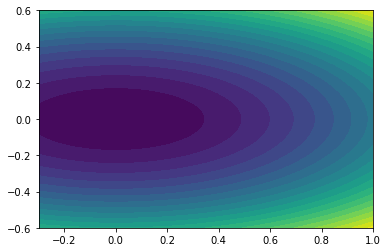

In [6]:
plt.contourf(tx,ty,F.transpose(),20);

**Instruction** : compute the  function giving the gradient of $f$.

In [70]:
'''
TO DO
'''

def f_grad(x): 
    return x[0] + tau * x[1] 

The step size should satisfy $\eta_t < 2/\tau$.
We use here a constant step size.

In [8]:
delta = 1.6/tau

In [74]:
x0 = np.array( [.9,.3] ) ## Initial point of the descent

**Instructions**: 
- Perform a gradient descent using a fixed step size $\delta_n=\delta$ with the function you computed above.
- Display the decay of the energy $f(x^{(n)})$ through the iteration. (Save the iterates so that X(:,n) corresponds to $x^{(n)}$.)

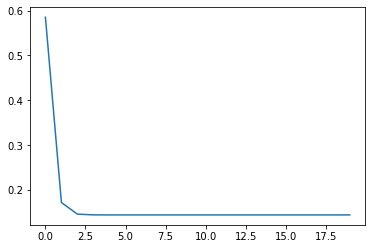

In [38]:
'''
TO DO
'''
n_steps = 20 
x_seq = gradient_descent(x0, delta, f_grad, n_steps) 
f_seq = np.zeros(n_steps) 
for i in range(n_steps): 
    f_seq[i] = f(x_seq[i]) 

fg1 = plt.figure(1) 
ax1 = fg1.add_subplot(111)
ax1.plot([i for i in range(n_steps)], f_seq) 
plt.show() 

**Instructions**: run again a gradient descent for different step sizes $\delta$. And plot the different trajectories.

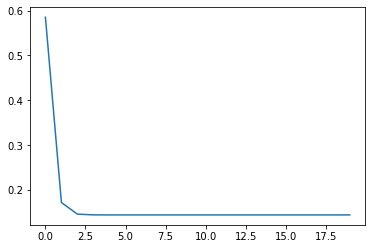

In [37]:
'''
TO DO
'''
delta   = 1/tau
n_steps = 20 
x_seq = gradient_descent(x0, delta, f_grad, n_steps) 
f_seq = np.zeros(n_steps) 
for i in range(n_steps): 
    f_seq[i] = f(x_seq[i]) 

fg2 = plt.figure(1) 
ax1 = fg2.add_subplot(111)
ax1.plot([i for i in range(n_steps)], f_seq) 
plt.show() 

### Accelerated gradient descent

Recall that to improve on gradient descent, it seems we need to abandon the relaxation sequence property. This means we shouldn’t insist that the function value always be decreasing; that perhaps allowing some oscillation is not only good, but also necessary to achieve a faster overall convergence.

From Nesterov work, the accelerated gradient descent is given by: 

\begin{equation}
\left\{
\begin{aligned}
y^{(n)} &=x^{(n)}- 1/L \nabla f\left(x^{(n)}\right)  \\
t^{(n+1)} &= (1 + \sqrt{1+4t^2_n)}/2 \\ 
x^{(n+1)} &=y^{(n)}-\frac{t^{(n)}-1}{t^{(n+1)}} (y^{(n)} - y^{(n-1)}) \\
\end{aligned}
\right.
\end{equation}

**Instruction**: create a function computing the accelerated gradient descent. Then execute it as before to minimize the same function $f$. 

In [91]:
'''
TO DO
'''

def accelerated_gradient_descent(x0, L, gradient_function, N): 
    d     = len(x0) 
    x_seq = np.zeros((N, d)) 
    y_seq = np.zeros((N, d)) 
    t_seq = np.zeros(N) 
    for i in range(N): 
        if (i == 0): 
            t_seq[i] = 1 
            x_seq[i] = x0 
            y_seq[i] = x0 
        elif (i == 1): 
            t_seq[i] = (1 + np.sqrt(1 + 4*(t_seq[i-1])**2)) / 2 
            x_seq[i] = x_seq[i-1] - ((1/L) * gradient_function(x_seq[i-1])) 
            y_seq[i] = x_seq[i] - ((1/L) * gradient_function(x_seq[i])) 
        else: 
            t_seq[i] = (1 + np.sqrt(1 + 4*(t_seq[i-1])**2)) / 2 
            x_seq[i] = y_seq[i-1] - (((t_seq[i-1] - 1)/t_seq[i]) * (y_seq[i-1] - y_seq[i-2])) 
            y_seq[i] = x_seq[i] - ((1/L) * gradient_function(x_seq[i])) 
            
    return x_seq

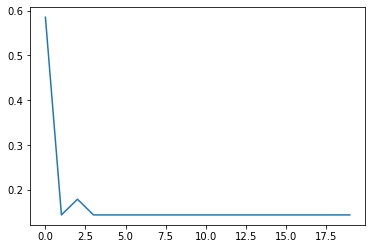

In [93]:
L = 5 
N = 20 
x_seq = accelerated_gradient_descent(x0, L, f_grad, N) 
f_seq = np.zeros(N) 
for i in range(N): 
    f_seq[i] = f(x_seq[i]) 
    
fg3 = plt.figure(1) 
ax1 = fg3.add_subplot(111)
ax1.plot([i for i in range(N)], f_seq) 
plt.show() 

### Adaptive Gradient

**Instruction**: Compute the adaptive gradient descent as in the lecture notes. Execute it as before.

In [77]:
'''
TO DO
'''

def adaptive_gradient_descent(x0, delta, k, function, gradient_function, N): 
    d     = len(x0) 
    x_seq = np.zeros((N, d)) 
    for i in range(N): 
        if (i == 0): 
            x_seq[i] = x0 
        else: 
            x_tilda = x_seq[i-1] - delta * gradient_function(x_seq[i-1]) 
            
            if (function(x_tilda) >= function(x_seq[i-1])): 
                delta = delta / 2 
                k = 0 
            else: 
                x_seq[i] = x_tilda 
                k += 1 
            
            if (k >= N): 
                delta = 1.5 * delta 
    
    return x_seq 

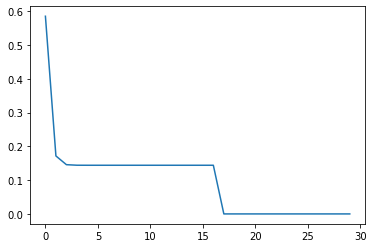

In [94]:
L = 5 
N = 30 
x_seq = adaptive_gradient_descent(x0, delta, 0, f, f_grad, N) 
f_seq = np.zeros(N) 
for i in range(N): 
    f_seq[i] = f(x_seq[i]) 
    
fg4 = plt.figure(1) 
ax1 = fg4.add_subplot(111)
ax1.plot([i for i in range(N)], f_seq) 
plt.show() 

## Gradient descent with PyTorch

**A simple regression problem**


$$ y = a + bx + \epsilon$$

It is a simple linear regression with one feature $x$, two parameters $a$ and $b$, $\epsilon$ being a white noise.

The loss (function to minimize) for a regression problem is the Mean Square Error (MSE):
$$
MSE= \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

where $\hat{y}=a+ b*x$ is a prediction.

We want here to use (stochastic) gradient descent to estimate parameters $a$ and $b$.

The next step is to compute partial derivatives with respect to each parameter.
Then,a gradient descent step allows to update each parameter.

$$
a^{(t+1)} = a^{(t)} - \eta \frac{\partial MSE}{\partial a}
$$
$$
b^{(t+1)} = b^{(t)} - \eta \frac{\partial MSE}{\partial b} 
$$

**Stochastic Gradient Descent**: you have a set of data $X$, of size $n$, and you simply use a random sample $x_i \in X$, $i \in \{1,\dots,n \}$ at each gradient descent step.


So for the regression problem, at each step of the gradient descent algorithm you pick a single pair $(x_i,y_i)$ to compute the loss function and estimate $a^{(t+1)}$ and $b^{(t+1)}$.

### Introduction to Pytorch

In [ ]:
conda install pytorch

In [96]:
import torch
import torch.optim as optim

ModuleNotFoundError: No module named 'torch'

PyTorch has objects named _tensors_, that are arrays with 3 or more dimensions. They are working like numpy arrays (which are technically tensors), with similar math functions...

In [ ]:
eta = 1e-1

# Data Generation
np.random.seed(42)
x = np.random.rand(100, 1)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

What distinguishes a tensor used for data from a tensor used as a (trainable) parameter/weight (like we want for a or b)?

The latter tensors require computation of its gradients, so we can update their values. That's what the `requires_grad=True` argument is good for.

In [ ]:
# FIRST
# Initializes parameters "a" and "b" randomly,
# since we want to apply gradient descent on these parameters, we need
# to set REQUIRES_GRAD = TRUE
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a, b)

### Automatic differentiation with autograd, part of PyTorch.

We need to invoke `backward()` method from the Python variable that have partial derivatives w.r.t parameters, so here the loss!

In [ ]:
# One run of gradient descent with pytorch

yhat = a + b * x_tensor
error = y_tensor - yhat
loss = (error ** 2).mean()
loss.backward()
print(a.grad)
print(b.grad)

with torch.no_grad():
    a -= eta * a.grad
    b -= eta * b.grad
    
a.grad.zero_()
b.grad.zero_()

print(a,b)

PyTorch’s ability to build a dynamic computation graph from every Python operation that involves any gradient-computing tensor or its dependencies.

**Stochastic Gradient Descent version**

We use here the existing SGD optimizer of Pytorch.

In [ ]:
# FIRST
# Initializes parameters "a" and "b" randomly,
# since we want to apply gradient descent on these parameters, we need
# to set REQUIRES_GRAD = TRUE
np.random.seed(10)
a = torch.randn(1, requires_grad=True, dtype=torch.float)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
print(a, b)

In [ ]:
# Defines a SGD optimizer to update the parameters a and b
optimizer = optim.SGD([a, b], lr=eta)

indexes = np.arange(0,y_tensor.shape[0])
np.random.shuffle(indexes)

for i in indexes:
    
    yhat = a + b * x_tensor[i]
    error = y_tensor[i] - yhat
    loss = (error ** 2).mean()
    loss.backward()
    

    optimizer.step() #### performs the updates
    ##### Equivalent to following lines
    # with torch.no_grad():
        # a -= eta * a.grad
        # b -= eta * b.grad
    # ---------
    
    optimizer.zero_grad()
    ####Equivalent to following lines
    # a.grad.zero_()
    # b.grad.zero_()
    # --------

print(a,b)

# Euler's Method

## Initial problem

Here we consider the following Initial Value Problem (IVP):
\begin{equation}
\left\{
\begin{aligned}
&y^\prime=f\left(x,y\right), \quad x\geq x_0\\
&y(0,y)= y_0
\end{aligned}
\right.
\end{equation}
with $y : x \mapsto y(x) \in \mathbb{R}^d$, $d \in \mathbb{N}^*$.

It is assumed that the considered Initial Value Problem possesses a unique solution for $x \in [x_0,x_{end}]$ with $x_{end}>x_0$.

## Resolution

We want to implement a method that takes as argument initial time $x_0$, final time $x_{end}$, step size $h$, an starting point $y(0,y) = y_0$, a function $f$ and that uses the iterative Euler formula :
$$
y_{i+1} = y_i + h f(x_i,y_i),\  \forall 1 \leq i \leq n.
$$


with $x_i = x_{i-1} + h$ and $n \in \{0,...,N\}$ with $N = \frac{x_{end}-x_0}{h}+1$.

**Instruction**: Implement this method, with a function $f$, initial time $x_0$, final time $x_{end}$, step size $h$ and starting point $y_0 = y(x_0)$.

In [ ]:
'''
TO DO
'''


## Example

We consider the model problem 
$$
f(x,y) =  2 - e^{-4x} - 2y,\quad y(0) = 1.
$$
The solution to the corresponding IVP is
$$
y_{sol} : x \mapsto 1 + \frac{1}{2} e ^{- 4x} - \frac{1}{2} e ^{ - 2x }.
$$

In [ ]:
def f(x,y):
    return 2 - np.exp(-4*x) - 2 * y

In [ ]:
def y_exa(x):
    return 1 + 1/2 * np.exp(-4*x) - 1/2 * np.exp(-2*x)

In [ ]:
x0 = 0.
xend = 1.4
h = 0.1
y0 = 1.

**Instruction**: use the Euler method to solve this problem, and plot the estimated values. Add a plot of the true values.

In [ ]:
'''
TO DO
'''
